# Data Analysis on Employee Attrition 
In this notebook, I performed data analysis on employee attrition in these steps.
* Data loading and Data Quality inspection.
* Data Cleaning
* Plotting Distributions
* Plotting Correlations
* Making Frequency or Count Plot
* Analysing Relationship with variables <br>
* Making Inferences.

I then prepared a powerpoint presentation of my findings.

In [1]:
# we import the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')

## data reading and preprocessing

In [2]:
FILE= 'data/HR-Employee-Attrition.csv'
data= pd.read_csv(FILE)

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

In [5]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# checking the packaging
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# the code replaces the coded variables with real data..

data['Education'].replace({1 :'Below College',
2: 'College',
3: 'Bachelor',
4 :'Master',
5 :'Doctor'}, inplace= True)

data['EnvironmentSatisfaction'].replace({1 :'Low',
2 :'Medium',
3 :'High',
4 :'Very High'}, inplace= True)

data['JobInvolvement'].replace({1: 'Low',
2 :'Medium',
3 :'High',
4: 'Very High'}, inplace= True)


data['JobSatisfaction'].replace({1: 'Low',
2: 'Medium',
3: 'High',
4 :'Very High'}, inplace= True)


data['PerformanceRating'].replace({1: 'Low',
2: 'Good',
3 :'Excellent',
4 :'Outstanding'}, inplace= True)


data['RelationshipSatisfaction'].replace({1: 'Low',
2 :'Medium',
3 :'High',
4 :'Very High'}, inplace= True)


data['WorkLifeBalance'].replace({1 :'Bad',
2: 'Good',
3: 'Better',
4 :'Best'}, inplace= True)



In [8]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,Better,2,2,2,2


In [9]:
# checking for missing values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
# selecting numeric and categorical data separetely

cat= data.select_dtypes('object')
num= data.select_dtypes('number')

In [11]:
cat.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,Sales Executive,Very High,Single,Y,Yes,Excellent,Low,Bad
1,No,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Medium,Research Scientist,Medium,Married,Y,No,Outstanding,Very High,Better
2,Yes,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,Laboratory Technician,High,Single,Y,Yes,Excellent,Medium,Better
3,No,Travel_Frequently,Research & Development,Master,Life Sciences,Very High,Female,High,Research Scientist,High,Married,Y,Yes,Excellent,High,Better
4,No,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,Laboratory Technician,Medium,Married,Y,No,Excellent,Very High,Better


In [12]:
# summary of the categorical columns
cat.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobRole,1470,9,Sales Executive,326
JobSatisfaction,1470,4,Very High,459


In [13]:
num.head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,1,94,2,5993,19479,8,11,80,0,8,0,6,4,0,5
1,49,279,8,1,2,61,2,5130,24907,1,23,80,1,10,3,10,7,1,7
2,37,1373,2,1,4,92,1,2090,2396,6,15,80,0,7,3,0,0,0,0
3,33,1392,3,1,5,56,1,2909,23159,1,11,80,0,8,3,8,7,3,0
4,27,591,2,1,7,40,1,3468,16632,9,12,80,1,6,3,2,2,2,2


In [14]:
# summary of the numeric columns
num.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,37.0,9.0,18.0,30.0,36.0,43.0,60.0
DailyRate,1470.0,802.0,404.0,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,1470.0,9.0,8.0,1.0,2.0,7.0,14.0,29.0
EmployeeCount,1470.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,1025.0,602.0,1.0,491.0,1020.0,1556.0,2068.0
HourlyRate,1470.0,66.0,20.0,30.0,48.0,66.0,84.0,100.0
JobLevel,1470.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0
MonthlyIncome,1470.0,6503.0,4708.0,1009.0,2911.0,4919.0,8379.0,19999.0
MonthlyRate,1470.0,14313.0,7118.0,2094.0,8047.0,14236.0,20462.0,26999.0
NumCompaniesWorked,1470.0,3.0,2.0,0.0,1.0,2.0,4.0,9.0


In [15]:
data['Attrition'].value_counts(normalize= True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

## checking for counts, distributions and correlations

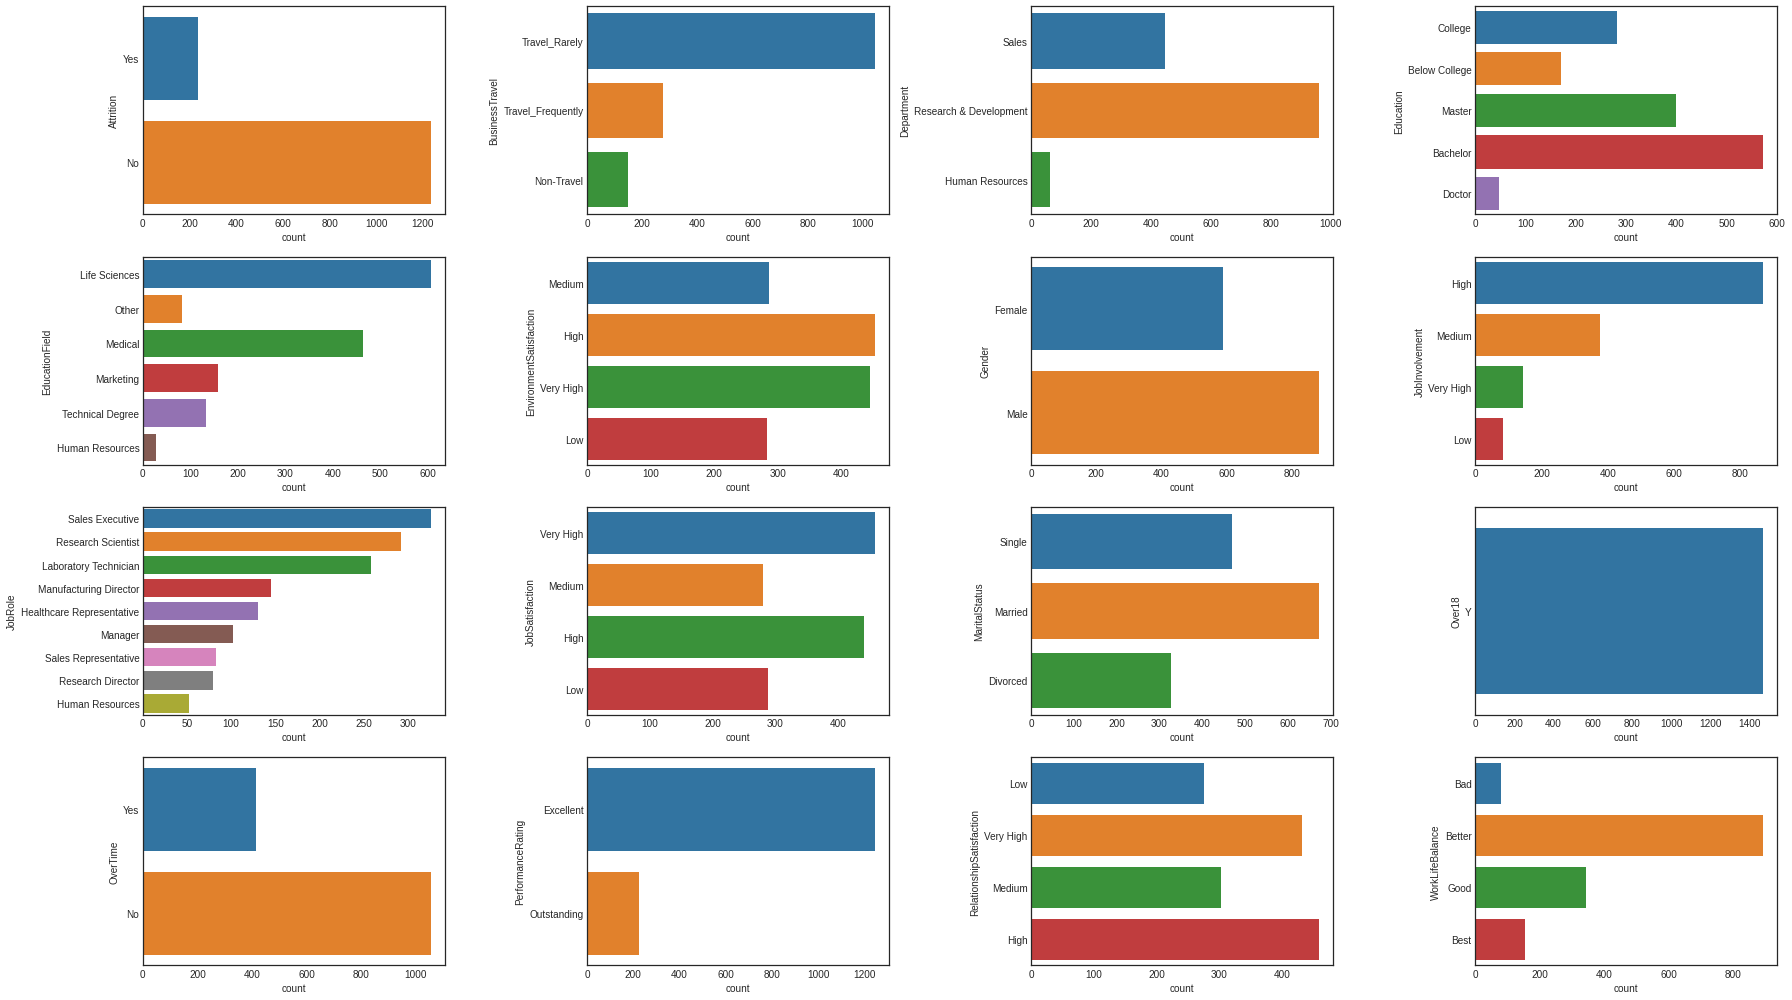

In [16]:
# make a countplot of the categorical columns
plt.figure(figsize= (25, 14))
for index, col in enumerate(cat.columns):
    plt.subplot(4, 4, index+1)
    plt.tight_layout()
    sns.countplot(y =data[col])

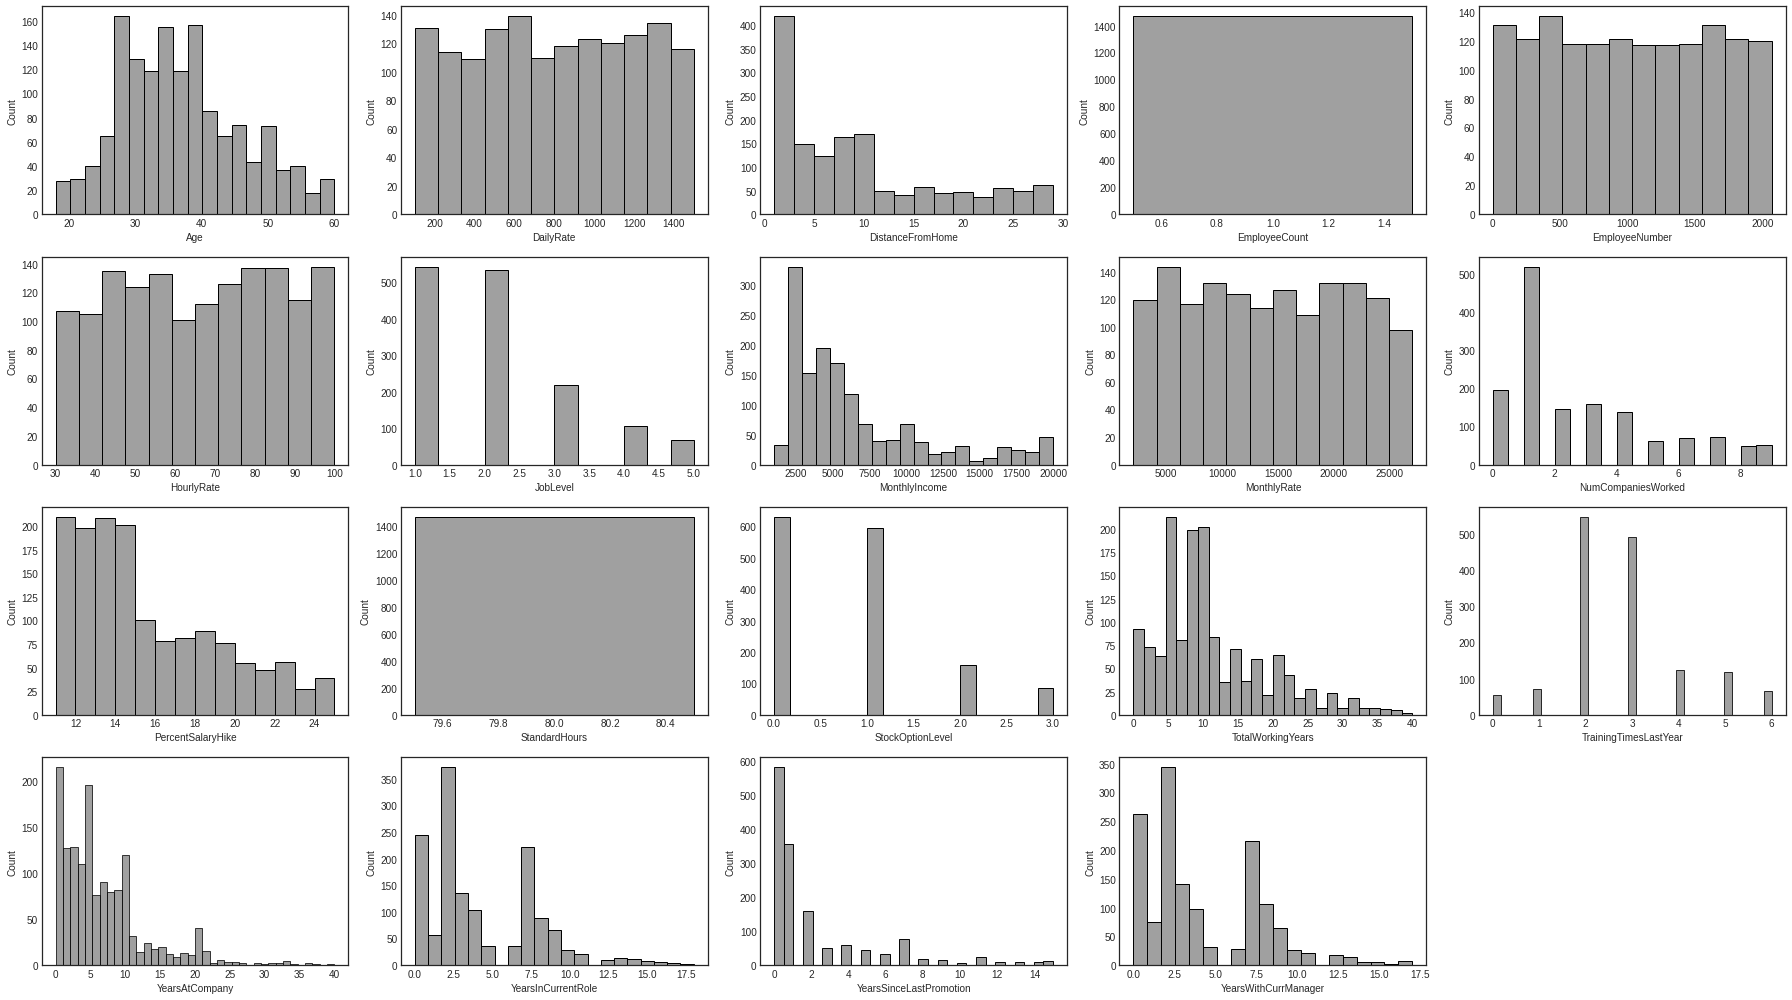

In [17]:
# distribution plot of the numeric columns
plt.figure(figsize= (25, 14))
for index, col in enumerate(num.columns):
    plt.subplot(4, 5, index+1)
    plt.tight_layout()
    sns.histplot(x = data[col], color='grey')

<AxesSubplot:>

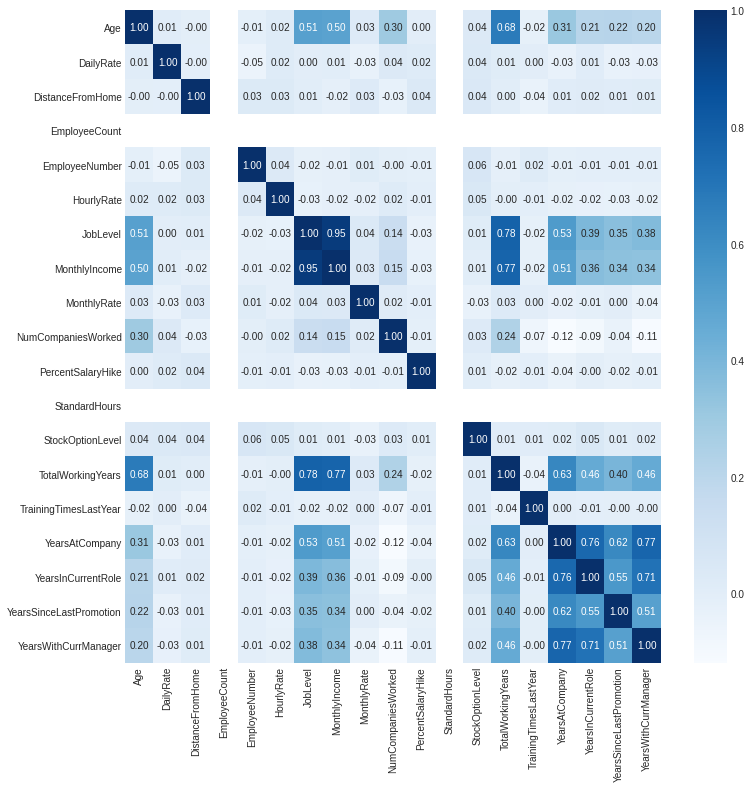

In [18]:
# correaltion plot of numeric columns
plt.figure(figsize= (12, 12))
sns.heatmap(num.corr(), annot= True, fmt= '.2f', cmap='Blues')

In [19]:
# Now we split the data into 
# attritee and non-attritee
attrt= data[data['Attrition'] == 'Yes']
stay= data[data['Attrition'] == 'No']

In [20]:
print(attrt.shape)
print(stay.shape)

(237, 35)
(1233, 35)


No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


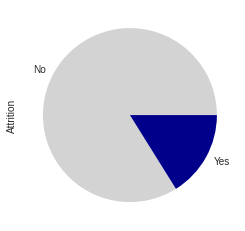

In [21]:
# pie chart of the Attrition column
data['Attrition'].value_counts().plot(kind= 'pie', colors= ['lightgrey', 'darkblue'], title='')
plt.savefig('outputs/Attrition-pie.jpg', transparent=True)


print(data['Attrition'].value_counts(normalize= True))

## Analyzing employee attrition

In [22]:
# we look at the attritee data
attrt.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Better,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,Bachelor,Life Sciences,1,19,...,Medium,80,0,6,4,Better,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,Master,Life Sciences,1,27,...,Medium,80,0,10,4,Better,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,Below College,Medical,1,31,...,High,80,0,8,2,Better,4,2,1,3


In [23]:
# we fetch the numeric and categorical data separtely
cat2 = attrt.select_dtypes('object')
num2= attrt.select_dtypes('number')

In [24]:
print(cat2.shape)
print(num2.shape)

(237, 16)
(237, 19)


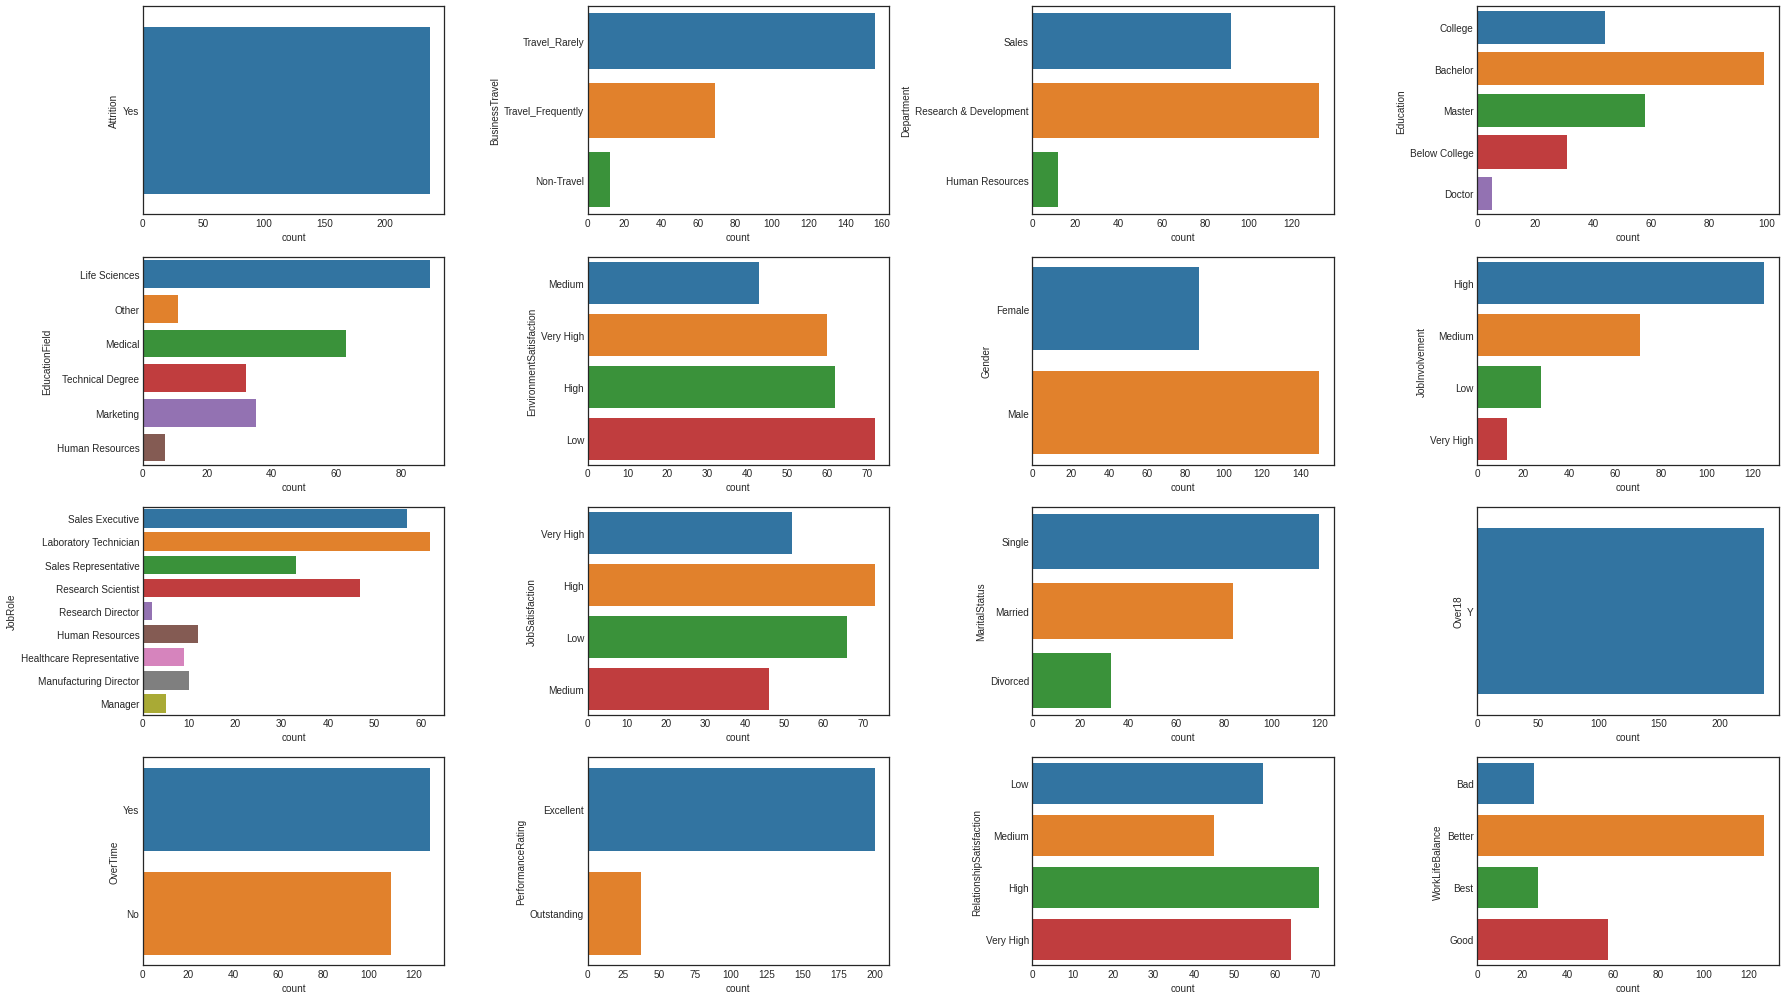

In [25]:
# make a count plot for the attritee data 
plt.figure(figsize= (25, 14))
for index, col in enumerate(cat2.columns):
    plt.subplot(4, 4, index+1)
    plt.tight_layout()
    sns.countplot(y =cat2[col])

...
From the chart above, 
we can see that small number of employee left, but is not that small, according to the data, around 16% of the employees attritted. it is a very large figure and need to be attended to.

* Most of the them did not have the business travels.
* Many of them were in the research department but some was also in sales department very few was in Human resource.

Also, it is clear that, 
* Most of them had high job involvementfew of them had **Very high** job involvement.
* Many of them had  **Excellent performance rating**.
* Most of the attritee had work life balance being **better**, few had **bad** worklife balance.

We can also see that most of the attritee was in **life science**s, some was also in the **medicine**, every few was into **human resource**.
Most had a bachelors degree

Lastly,
The number of male attritee was greater the number of females, only 36% was female.

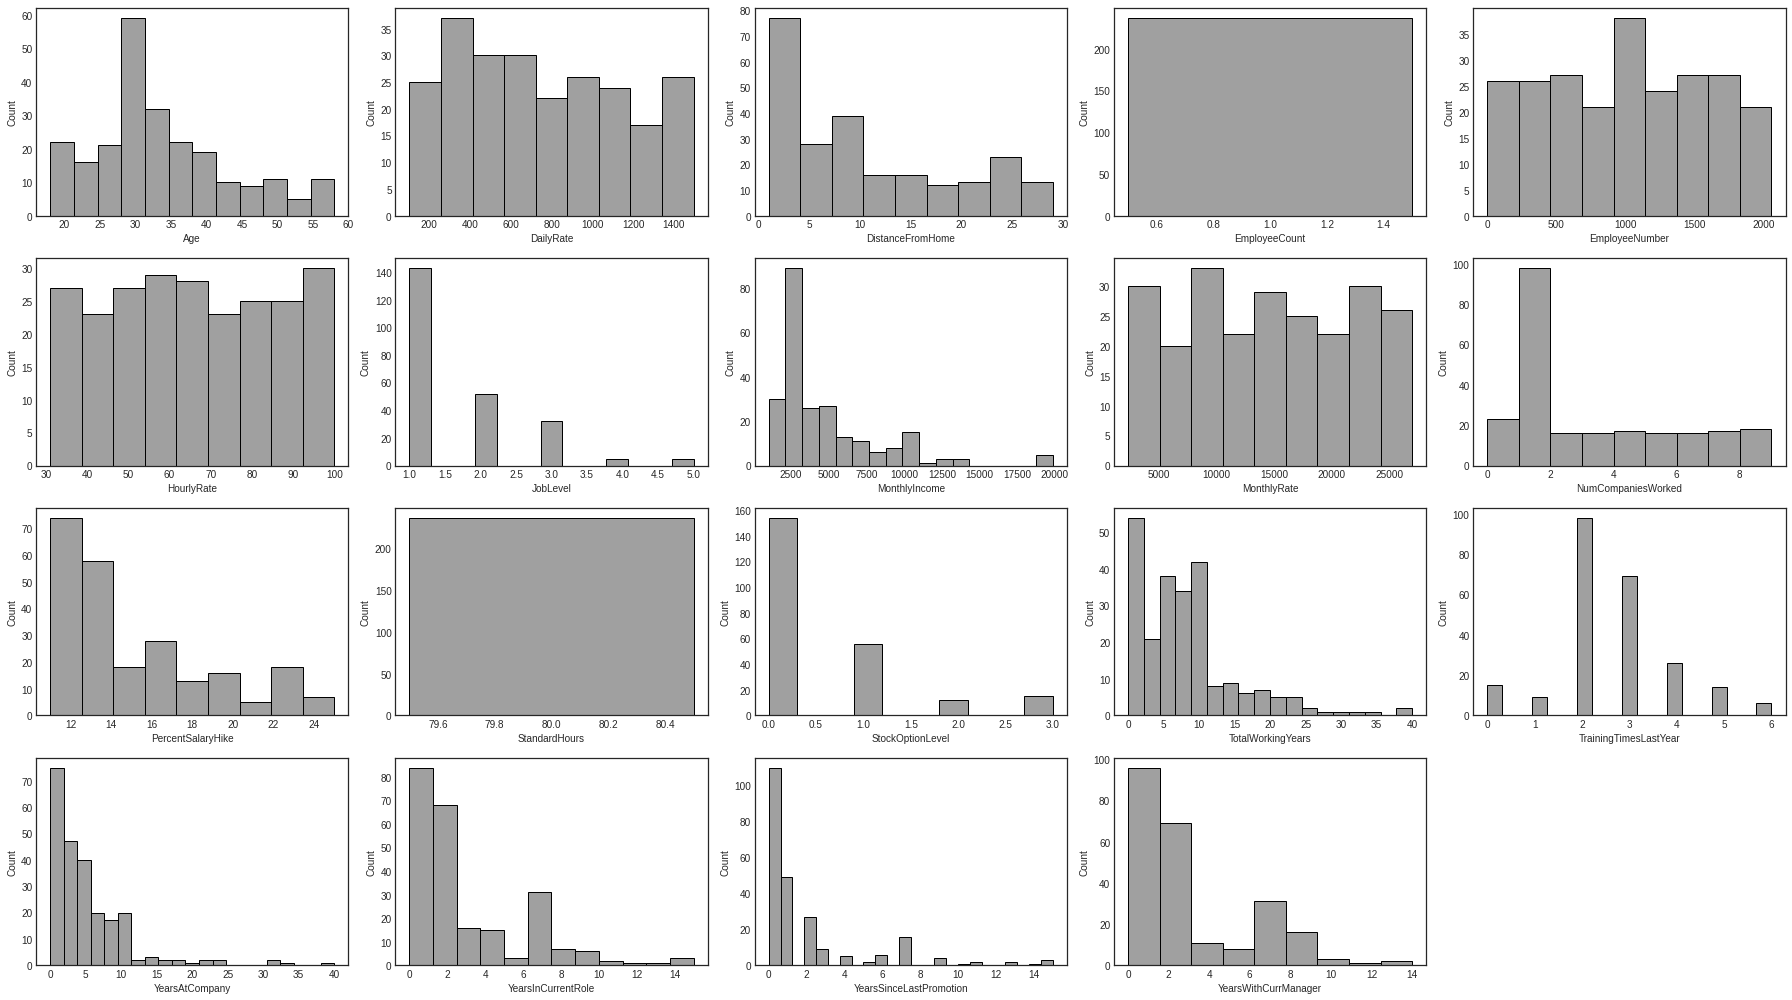

In [26]:
# make a histogram plot for the attritee data
plt.figure(figsize= (25, 14))
for index, col in enumerate(num2.columns):
    plt.subplot(4, 5, index+1)
    plt.tight_layout()
    sns.histplot(x =num2[col], color='grey')

Looking at the figure above,

* We see that most attritees had **age** between 20 and 40.
* We also see that many has **job level** 1 followed by job level 2.
* The most occurring **monthly income** of the attritees was around 2500, very few of them had Monthly Income around 100,000 or greater than that.
* We can also see that most had worked in less than 3 **companies**.

Also, 
* Most of the attritees had 10% to 14% of **salary hike**.
* Majority of them had 2 to 3 times of **training**.
* Almost all of them had **years at the company** between 1 and 10, few had years greater than 10.

Lastly,
* Majority of them had years at **current role** between 1 and 2, some had 7.
* most them had less than 3 years with their **current manager**.

In [27]:
# correlations
# for the attritee data 
corr1 = num2.corr()

<AxesSubplot:>

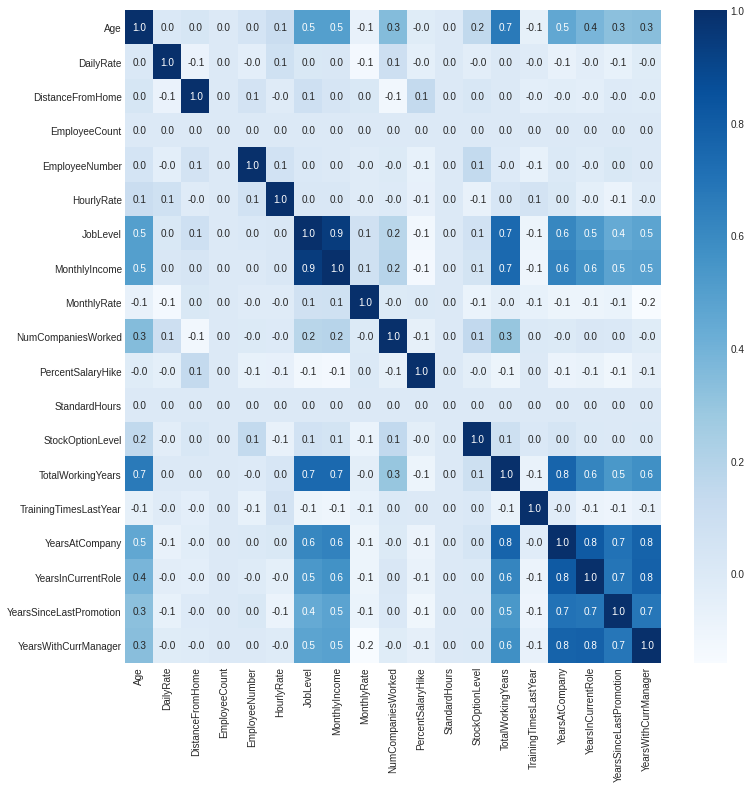

In [28]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr1.fillna(0), annot=True, fmt= '.1f', cmap= 'Blues')

The correlation plot depicts the linear statistical relationship between the variables.
It is clear that 
* Age
* Job Level
* Monthly Income
* Total working years
* Years at company
* Years at the current role
* Years since last promotion
and ***Years with current manager*** shows a strong positive linear relationship between each other.
This will be a great candidate for out analysis.

Next we will be creating a new data with the most significant categorical features and numerical features with fair correlation,
and we will be using this data for our analysis.

In [29]:
num2.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
       'EmployeeNumber', 'HourlyRate', 'JobLevel', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [30]:
# we select the columns with visible evidence of high correlation
# an also with evidnece that proves the reason for employee attrition.
new_col = ['Age', 'Attrition', 'JobLevel', 'MonthlyIncome', 
             'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', "PercentSalaryHike",
             'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel',
             'Department',
             'Education',
             'EducationField',
             'EnvironmentSatisfaction',
             'Gender',
             'JobInvolvement',
             'JobRole',
             'MaritalStatus',
             'PerformanceRating',
             'WorkLifeBalance']

In [31]:
len(new_col)

21

In [32]:
# we create a new data of the newly selected column
new_data = attrt[new_col]

In [33]:
new_data.head()

,Age,Attrition,JobLevel,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,PercentSalaryHike,YearsSinceLastPromotion,YearsWithCurrManager,...,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,MaritalStatus,PerformanceRating,WorkLifeBalance
0,41,Yes,2,5993,8,6,4,11,0,5,...,Sales,College,Life Sciences,Medium,Female,High,Sales Executive,Single,Excellent,Bad
2,37,Yes,1,2090,7,0,0,15,0,0,...,Research & Development,College,Other,Very High,Male,Medium,Laboratory Technician,Single,Excellent,Better
14,28,Yes,1,2028,6,4,2,14,0,3,...,Research & Development,Bachelor,Life Sciences,High,Male,Medium,Laboratory Technician,Single,Excellent,Better
21,36,Yes,1,3407,10,5,3,23,0,3,...,Sales,Master,Life Sciences,High,Male,Medium,Sales Representative,Single,Outstanding,Better
24,34,Yes,1,2960,8,4,2,11,1,3,...,Research & Development,Below College,Medical,Medium,Male,High,Research Scientist,Single,Excellent,Better


## checking for relationship between variables
we analyze income vs other factors in the subsequent cells

## 1. Income vs Education

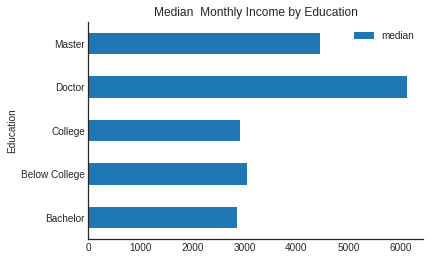

In [34]:

## Education level and Monthly income
ax = new_data.groupby(['Education'])['MonthlyIncome'].\
agg(['median']).\
plot(kind= 'barh')
ax.set_title('Median  Monthly Income by Education')
sns.despine()

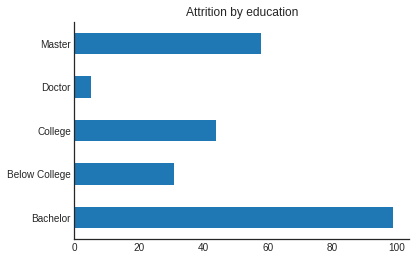

In [35]:
new_data['Education'].value_counts().sort_index().plot(kind= 'barh', title= 'Attrition by education')
sns.despine()

By comparing the two chart, we notice that Monthly Income partly affects the atrittion of employees very well.

Viewed in Education level,
We can see that The Monthly Income of **Masters and  Doctor degree** was quite higher than the other degrees, and by looking at the corresponding Attrition chart we can that most of the attritees had **Bachelors** degree very few had Doctors.
But shockingly the second highest number had **Masters Degree**

## 2. Income vs Salary hike

In [36]:
new_data.head()

,Age,Attrition,JobLevel,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,PercentSalaryHike,YearsSinceLastPromotion,YearsWithCurrManager,...,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,MaritalStatus,PerformanceRating,WorkLifeBalance
0,41,Yes,2,5993,8,6,4,11,0,5,...,Sales,College,Life Sciences,Medium,Female,High,Sales Executive,Single,Excellent,Bad
2,37,Yes,1,2090,7,0,0,15,0,0,...,Research & Development,College,Other,Very High,Male,Medium,Laboratory Technician,Single,Excellent,Better
14,28,Yes,1,2028,6,4,2,14,0,3,...,Research & Development,Bachelor,Life Sciences,High,Male,Medium,Laboratory Technician,Single,Excellent,Better
21,36,Yes,1,3407,10,5,3,23,0,3,...,Sales,Master,Life Sciences,High,Male,Medium,Sales Representative,Single,Outstanding,Better
24,34,Yes,1,2960,8,4,2,11,1,3,...,Research & Development,Below College,Medical,Medium,Male,High,Research Scientist,Single,Excellent,Better


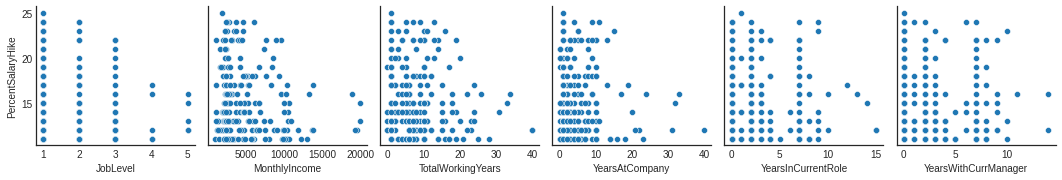

In [37]:
sns.pairplot(data=new_data,
            x_vars= ['JobLevel', 'MonthlyIncome', 'TotalWorkingYears', 
                     'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'],
            y_vars= ['PercentSalaryHike'])

**From the chart, the salary hike decreases as JobLevel Increases.**

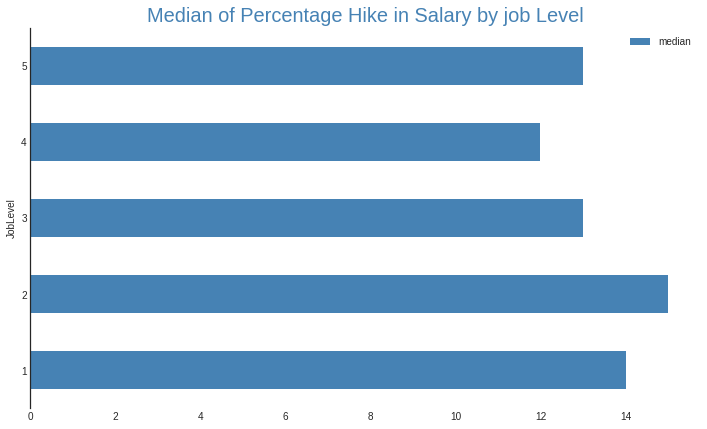

In [38]:
new_data.groupby(['JobLevel'])['PercentSalaryHike'].agg(['median']).\
plot(kind='barh', figsize=(12, 7), color= 'steelblue')
plt.title('Median of Percentage Hike in Salary by job Level', size=20, color='steelblue')
sns.despine(left=False, bottom=True)
plt.savefig('outputs/%hike.png', transparent=True)
new_data.groupby(['JobLevel'])['PercentSalaryHike'].agg(['sum']).to_csv('outputs/jobLevel&hike.txt')

.

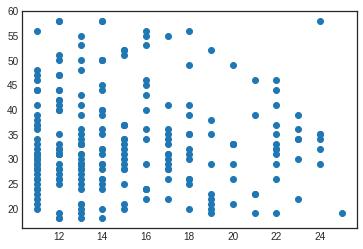

In [39]:
plt.scatter(data=new_data, x = 'PercentSalaryHike', y='Age')

## 3. Income vs Years at the company.

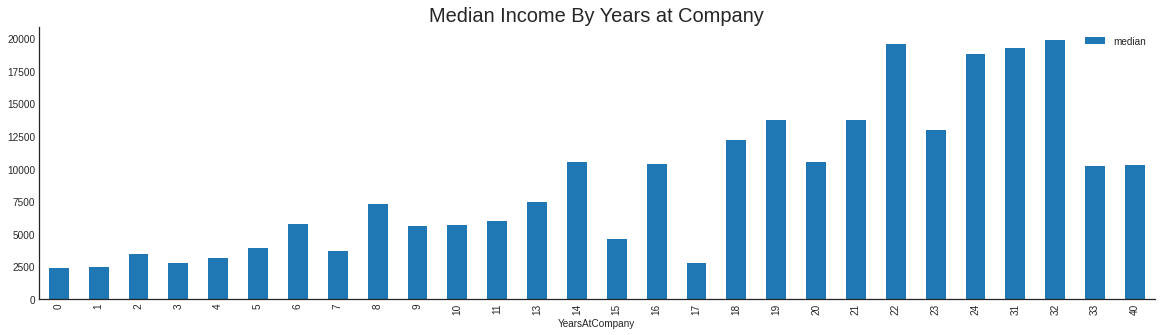

In [40]:
new_data.groupby(['YearsAtCompany'])['MonthlyIncome'].\
agg(['median']).\
plot(kind= 'bar', figsize=(20, 5)).set_title('Median Income By Years at Company', size=20)
sns.despine()

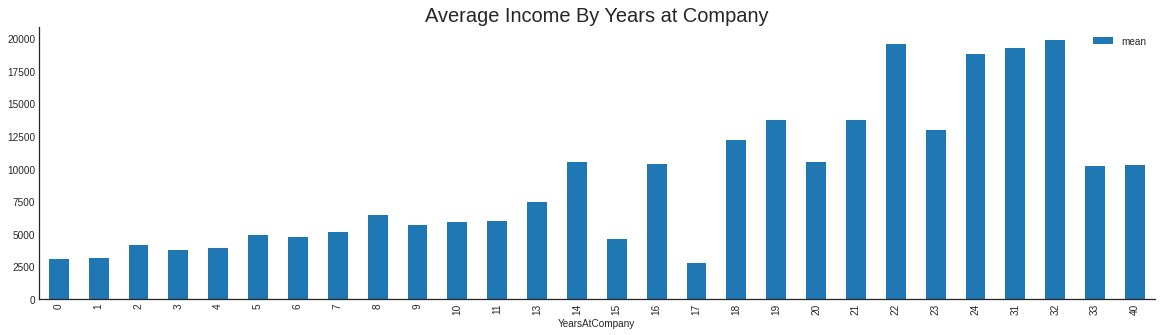

In [41]:
new_data.groupby(['YearsAtCompany'])['MonthlyIncome'].\
agg(['mean']).\
plot(kind= 'bar', figsize=(20, 5)).set_title('Average Income By Years at Company', size=20)
sns.despine()

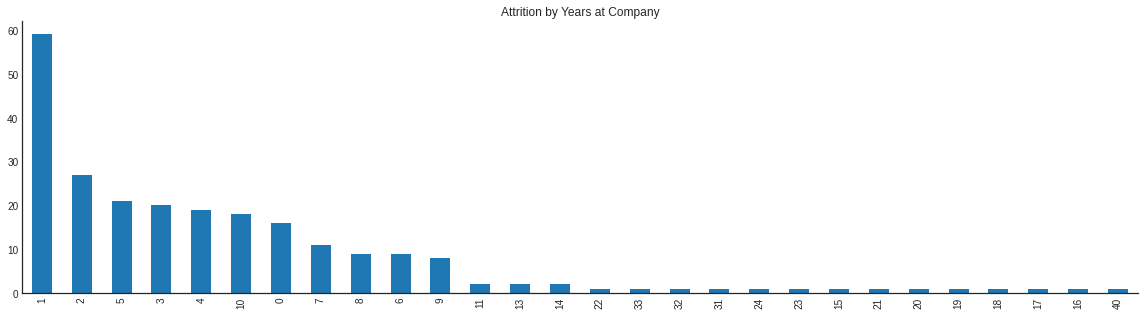

In [42]:
new_data['YearsAtCompany'].value_counts().\
plot(kind='bar', figsize=(20, 5), title = 'Attrition by Years at Company')
sns.despine()

Looking at the relationship between monthly income and the number of attritee, we notice an inverse relationship here, most at times the median income of the employee increase as the number of years increases but attrition level decreases as the the number of years at the company increase.<br>

Meaning most of the attritees had less years at the company. and also as the number of years at the company increases the monthly income increases too we can say the it leads to decrease in the attrition rate.
Therefore Monthly income is an important factor of employee attrition.

## 4. Income vs Job level

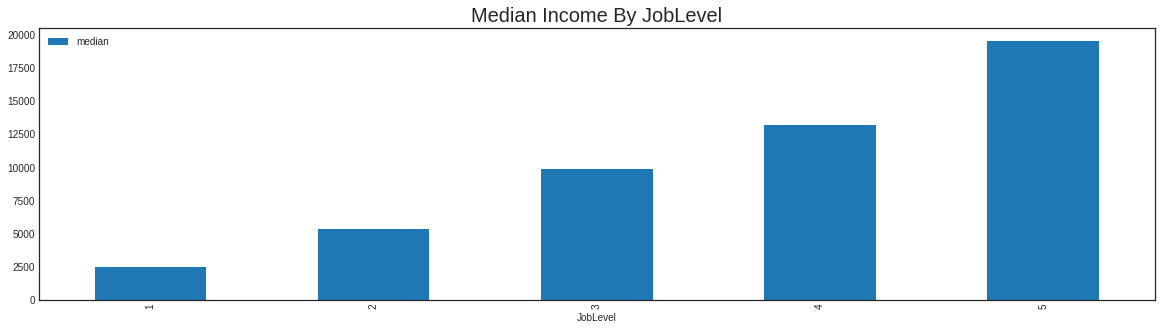

In [43]:
r= new_data.groupby(['JobLevel'])['MonthlyIncome'].\
agg(['median']).\
plot(kind= 'bar', figsize=(20, 5)).set_title('Median Income By JobLevel', size=20)

Text(0.5, 1.0, 'Attrition by Job Level')

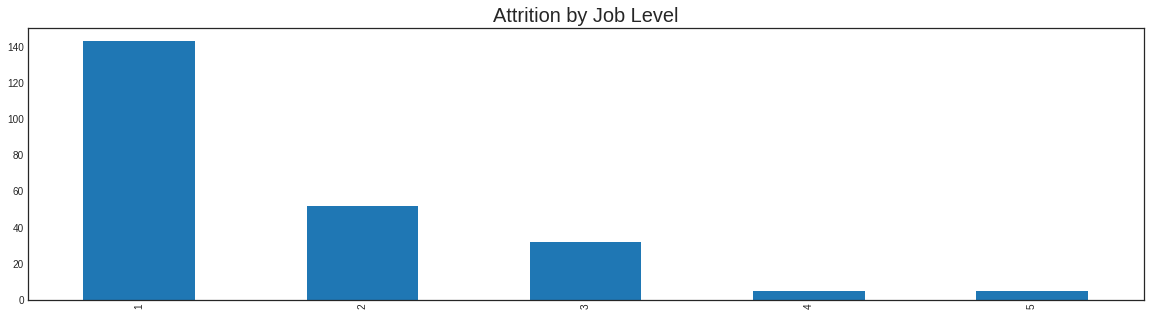

In [44]:
f = new_data['JobLevel'].value_counts().plot(kind='bar', figsize=(20, 5))
f.set_title('Attrition by Job Level', size= 20)

The two chart above shows monthly income and attrition by job level.
* There is a clear inverse realationship between attrition and monthly income.
* Median income increases as the Job level increases.
* Attrition  rate increase as the job level decrease.

We can say that Monthly income also plays an important role in attrition of employees at the Job Level perspective.

.

## 5. Income vs Total working years.

<AxesSubplot:title={'center':'Total working years by Income'}, xlabel='TotalWorkingYears'>

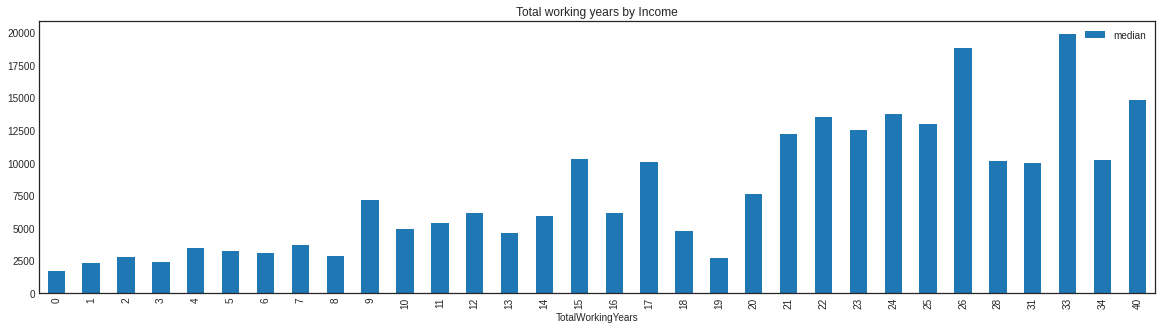

In [45]:
new_data.groupby(['TotalWorkingYears'])['MonthlyIncome'].agg(['median']).\
plot(kind= 'bar', figsize= (20, 5), title ='Total working years by Income')

<AxesSubplot:title={'center':'Attrition by Total Working Years'}>

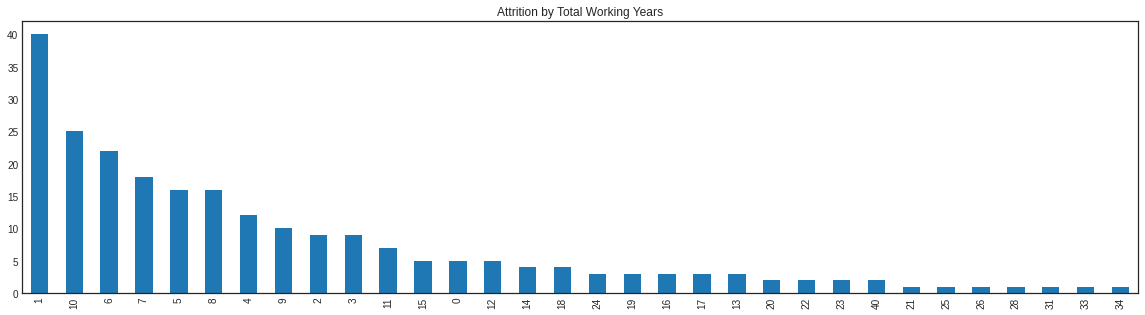

In [46]:
new_data['TotalWorkingYears'].value_counts().plot(kind= 'bar', figsize=(20, 5), title= 'Attrition by Total Working Years')

Looking at the **total working years** we see a reverse relation to the attrition rate and the monthly income.
* From the first figure we notice that as total working years increase the monthly income increases too.
* From the second figure we found out that attrition increase as the number of working years decreases.

We can also conclude here that Monthly Income affects the attrition rate at this level too.

.

## 6. Income vs Promotion (since last year)

<AxesSubplot:title={'center':'monthly-income vs. yr since last promotion'}, xlabel='YearsSinceLastPromotion'>

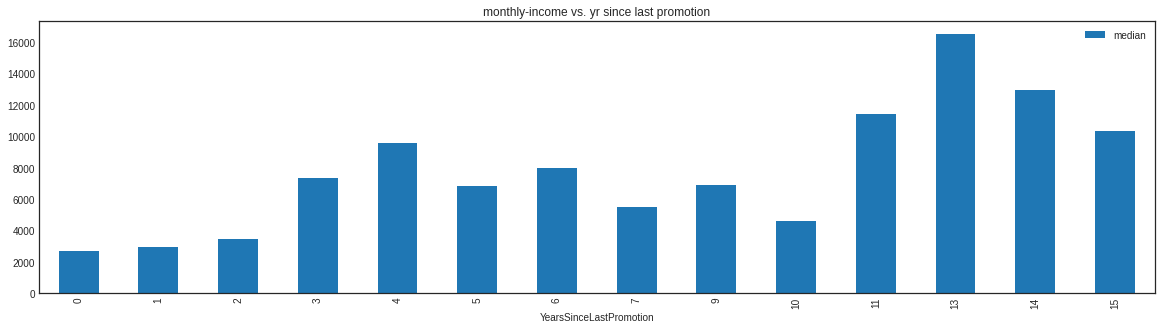

In [47]:
new_data.groupby(['YearsSinceLastPromotion'])['MonthlyIncome'].agg(['median']).\
plot(kind='bar', figsize= (20, 5), title= "monthly-income vs. yr since last promotion")

Text(0.5, 1.0, 'Years since last promotion vs. attrition')

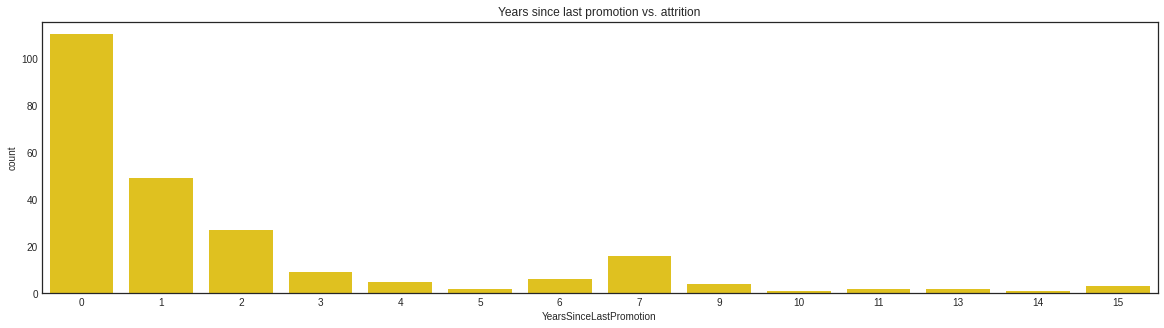

In [48]:
plt.figure(figsize=(20, 5))
sns.countplot(x = new_data['YearsSinceLastPromotion'], color='gold')
plt.title('Years since last promotion vs. attrition')

The 2 plots above shows that **promotion** counts as a least factor that causes employee attrition.

We can see that years since last promotion do not have liner relationship with Monthly income.
But looking at the second graph, we observe that attrition increases with less years since last promotion.
Meaning the employees was not leaving because they were not getting promoted, is due to other reasons.

## 7. Environment satisfaction

Low          0.303797
High         0.261603
Very High    0.253165
Medium       0.181435
Name: EnvironmentSatisfaction, dtype: float64


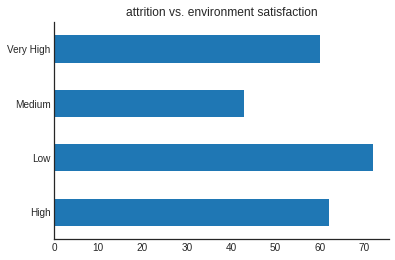

In [49]:
new_data['EnvironmentSatisfaction'].value_counts().sort_index().\
plot(kind='barh', title= 'attrition vs. environment satisfaction')
print(new_data['EnvironmentSatisfaction'].value_counts(normalize=True))
sns.despine()

In [80]:
new_data['EnvironmentSatisfaction'].value_counts(normalize=False)

Low          72
High         62
Very High    60
Medium       43
Name: EnvironmentSatisfaction, dtype: int64

In [79]:
new_data.shape

(237, 21)

In [81]:
72/237

0.3037974683544304

<AxesSubplot:ylabel='EnvironmentSatisfaction'>

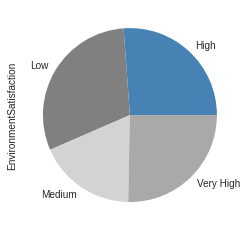

In [50]:
new_data['EnvironmentSatisfaction'].value_counts().sort_index().\
plot(kind='pie', colors= ['steelblue', 'grey', 'lightgrey','darkgrey'])

In [51]:
new_data['EnvironmentSatisfaction'].value_counts().reset_index()

,index,EnvironmentSatisfaction
0,Low,72
1,High,62
2,Very High,60
3,Medium,43


                              sum
EnvironmentSatisfaction          
High                     0.227167
Low                      0.329146
Medium                   0.200249
Very High                0.243438


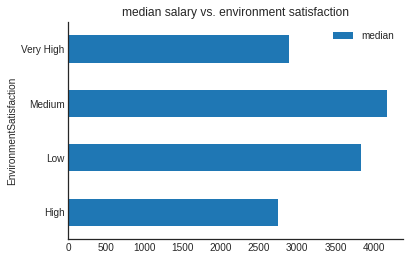

In [52]:
print(new_data.groupby(['EnvironmentSatisfaction'])['MonthlyIncome'].agg(['sum'])/np.sum(new_data['MonthlyIncome']))
new_data.groupby(['EnvironmentSatisfaction'])['MonthlyIncome'].\
agg(['median']).plot(kind='barh', title= 'median salary vs. environment satisfaction')
sns.despine()

**satisfaction does not say much about the reason for employee attrition**

## 8. Job involvement

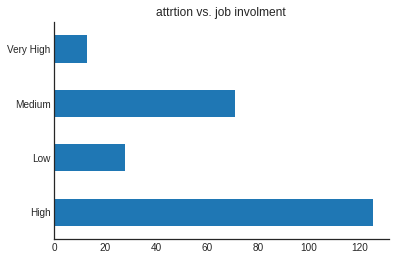

In [53]:
new_data['JobInvolvement'].value_counts().sort_index().plot(kind= 'barh', title= 'attrtion vs. job involment')
sns.despine()

In [54]:
new_data['JobInvolvement'].value_counts(normalize=True)

High         0.527426
Medium       0.299578
Low          0.118143
Very High    0.054852
Name: JobInvolvement, dtype: float64

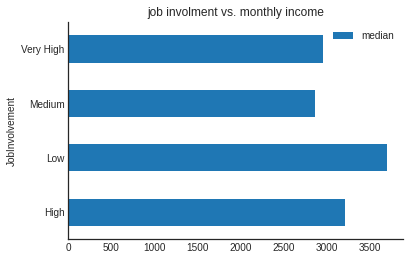

In [55]:
new_data.groupby(['JobInvolvement'])['MonthlyIncome'].agg(['median']).\
plot(kind= 'barh', title= 'job involment vs. monthly income')
sns.despine()

**Job involvement is not affected by income and it doesn't really affect employee attrition**

## 9. Marital Status

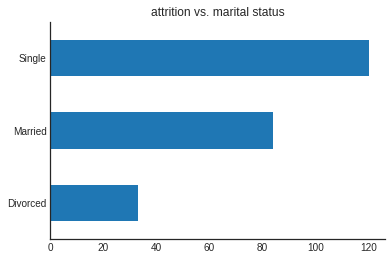

In [56]:
new_data['MaritalStatus'].value_counts().sort_index().plot(kind= 'barh', title= 'attrition vs. marital status')
sns.despine()

**It is clear that most of the attritee are single, couple of thema are Married too. Very few are divorced.**

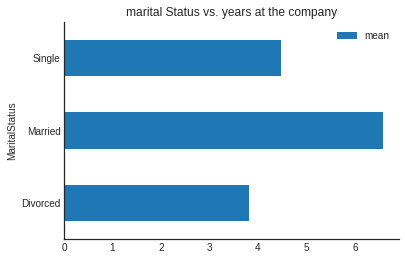

In [57]:
new_data.groupby(['MaritalStatus'])['YearsAtCompany'].agg(['mean']).\
plot(kind='barh',  title= 'marital Status vs. years at the company')
sns.despine()

**Divorced employee had less years spent at the company according to the data.**

In [58]:
new_data.head()

,Age,Attrition,JobLevel,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,PercentSalaryHike,YearsSinceLastPromotion,YearsWithCurrManager,...,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,MaritalStatus,PerformanceRating,WorkLifeBalance
0,41,Yes,2,5993,8,6,4,11,0,5,...,Sales,College,Life Sciences,Medium,Female,High,Sales Executive,Single,Excellent,Bad
2,37,Yes,1,2090,7,0,0,15,0,0,...,Research & Development,College,Other,Very High,Male,Medium,Laboratory Technician,Single,Excellent,Better
14,28,Yes,1,2028,6,4,2,14,0,3,...,Research & Development,Bachelor,Life Sciences,High,Male,Medium,Laboratory Technician,Single,Excellent,Better
21,36,Yes,1,3407,10,5,3,23,0,3,...,Sales,Master,Life Sciences,High,Male,Medium,Sales Representative,Single,Outstanding,Better
24,34,Yes,1,2960,8,4,2,11,1,3,...,Research & Development,Below College,Medical,Medium,Male,High,Research Scientist,Single,Excellent,Better


Text(0.5, 1.0, 'Job level vs. Years at the company')

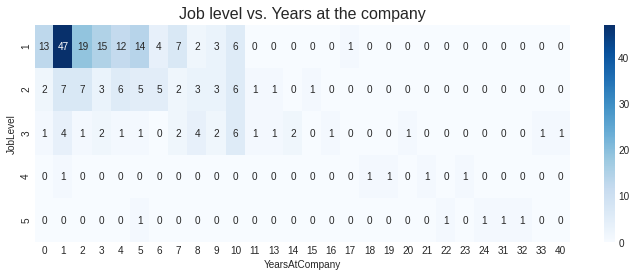

In [59]:
plt.figure(figsize= (12, 4))
sns.heatmap(data= pd.crosstab(new_data['JobLevel'], new_data['YearsAtCompany']),
           annot= True, cmap='Blues')
plt.title('Job level vs. Years at the company', size= 16)

**Why would an employee with the least job level leave a company if he/she spent less than 5 years at the company?**

Text(0.5, 1.0, 'Promotion vs. Years at the company')

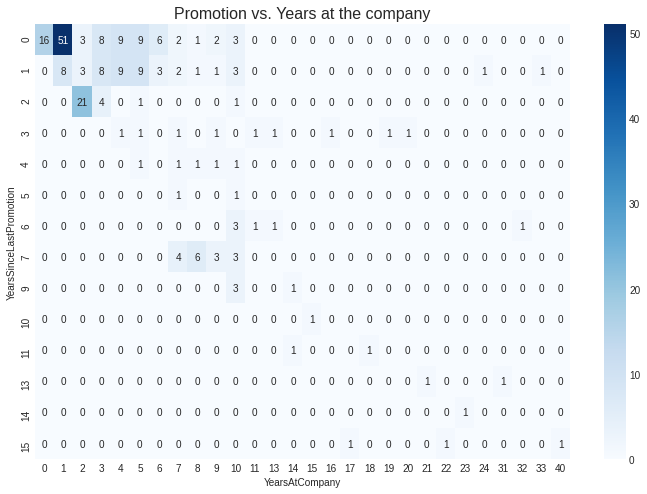

In [60]:
plt.figure(figsize= (12, 8))
sns.heatmap(data= pd.crosstab(new_data['YearsSinceLastPromotion'], new_data['YearsAtCompany']),
           annot= True, cmap='Blues')
plt.title('Promotion vs. Years at the company', size= 16)

**Why are employees with less than 4 years at the company leaving he most, is it because of promotion?**

Text(0.5, 1.0, 'Department by Promotion')

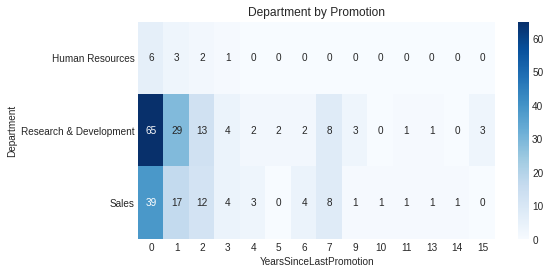

In [61]:
plt.figure(figsize= (8, 4))
sns.heatmap(data= pd.crosstab(new_data['Department'], new_data['YearsSinceLastPromotion']),
           annot= True, cmap='Blues')
plt.title('Department by Promotion')

**Why is the Reseach&Development and the Sales department leaving? Almost all of them had less than 4 years at the company.**

Text(0.5, 1.0, 'Performance rating by Years at the company')

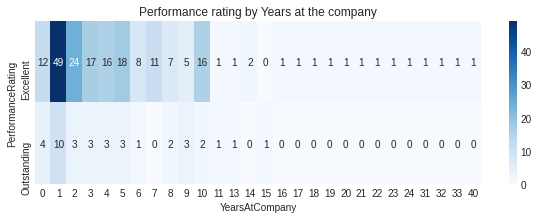

In [62]:
plt.figure(figsize= (10, 3))
sns.heatmap(data= pd.crosstab(new_data['PerformanceRating'], new_data['YearsAtCompany']),
           annot= True, cmap='Blues')
plt.title('Performance rating by Years at the company')

**What is causing Employees with High Performance rating to leave?**

Text(0.5, 1.0, 'Environment satisfaction by Years at the Company')

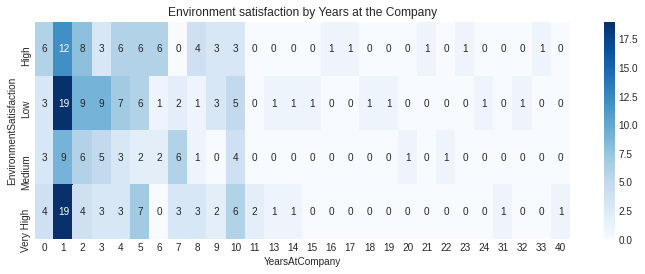

In [63]:
plt.figure(figsize= (12, 4))
sns.heatmap(data= pd.crosstab(new_data['EnvironmentSatisfaction'], new_data['YearsAtCompany']),
           annot= True, cmap='Blues')
plt.title('Environment satisfaction by Years at the Company')

**Is Enivronment satisfaction really one of the key factors of employee attrition?**

## 10. Years spent with the current manager.

Text(0.5, 1.0, 'Environment satisfaction by **Years with Current Manager')

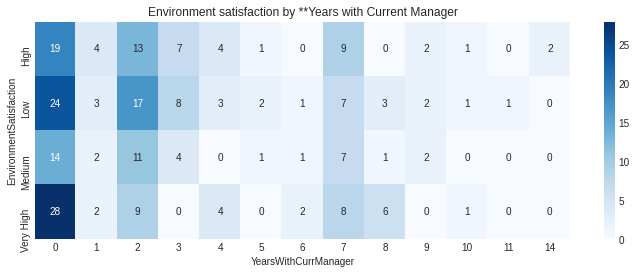

In [64]:
plt.figure(figsize= (12, 4))
sns.heatmap(data= pd.crosstab(new_data['EnvironmentSatisfaction'], new_data['YearsWithCurrManager']),
           annot= True, cmap='Blues')
plt.title('Environment satisfaction by **Years with Current Manager')

**Working environment + years with current manager can also be the cause of employee attrition.**

## 11. Business Travel.

Text(0.5, 1.0, 'Department by Business Travel')

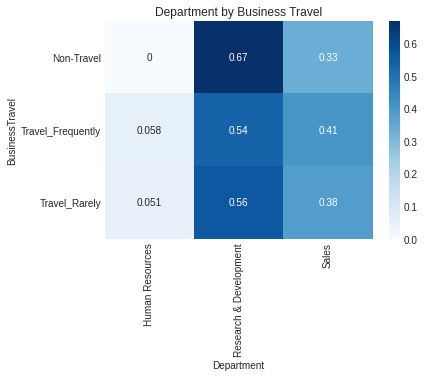

In [65]:
plt.figure(figsize= (6, 4))
sns.heatmap(data= pd.crosstab(new_data['BusinessTravel'], new_data['Department'], normalize='index'),
           annot= True, cmap='Blues')
plt.title('Department by Business Travel')

**Attrition of employes at certain department was greatly influenced by business travel**

In [70]:
new_data['BusinessTravel'].value_counts(normalize=True)

Travel_Rarely        0.658228
Travel_Frequently    0.291139
Non-Travel           0.050633
Name: BusinessTravel, dtype: float64

In [75]:
data[(data['BusinessTravel']=='Non-Travel') & \
     (data['Attrition']=='Yes')]['Department'].value_counts(normalize=True)

Research & Development    0.666667
Sales                     0.333333
Name: Department, dtype: float64

Text(0.5, 1.0, 'Gender vs. Years since last promotion')

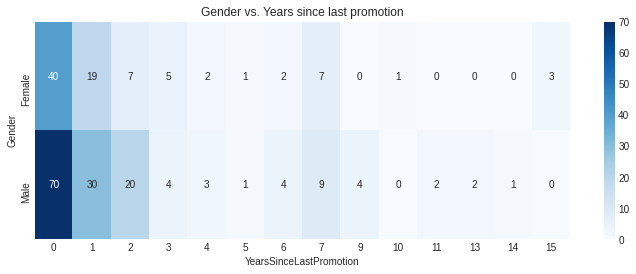

In [66]:
plt.figure(figsize= (12, 4))
sns.heatmap(data= pd.crosstab(new_data['Gender'], new_data['YearsSinceLastPromotion']),
           annot= True, cmap='Blues')
plt.title('Gender vs. Years since last promotion')

## 12. Gender related

Text(0.5, 1.0, 'Job level by Gender')

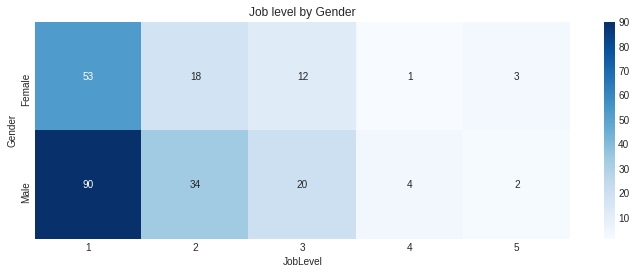

In [67]:
plt.figure(figsize= (12, 4))
sns.heatmap(data= pd.crosstab(new_data['Gender'], new_data['JobLevel']),
           annot= True, cmap='Blues')
plt.title('Job level by Gender')

**The above charts clearly shows that male employees where the most to leave the company.**

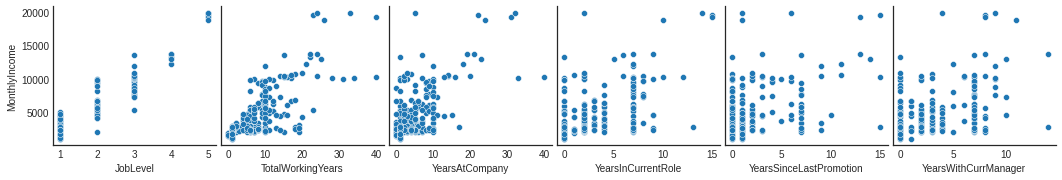

In [68]:
sns.pairplot(data= new_data, x_vars= ['JobLevel', 'TotalWorkingYears', 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',], y_vars=['MonthlyIncome'])

In [69]:
new_data.head()

,Age,Attrition,JobLevel,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,PercentSalaryHike,YearsSinceLastPromotion,YearsWithCurrManager,...,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,MaritalStatus,PerformanceRating,WorkLifeBalance
0,41,Yes,2,5993,8,6,4,11,0,5,...,Sales,College,Life Sciences,Medium,Female,High,Sales Executive,Single,Excellent,Bad
2,37,Yes,1,2090,7,0,0,15,0,0,...,Research & Development,College,Other,Very High,Male,Medium,Laboratory Technician,Single,Excellent,Better
14,28,Yes,1,2028,6,4,2,14,0,3,...,Research & Development,Bachelor,Life Sciences,High,Male,Medium,Laboratory Technician,Single,Excellent,Better
21,36,Yes,1,3407,10,5,3,23,0,3,...,Sales,Master,Life Sciences,High,Male,Medium,Sales Representative,Single,Outstanding,Better
24,34,Yes,1,2960,8,4,2,11,1,3,...,Research & Development,Below College,Medical,Medium,Male,High,Research Scientist,Single,Excellent,Better


### Possible Reasons for Employee Attrition

* Income and Salary hike problem.
* Business travel for some departments
* Relation with the current manager
* Employee satisfaction (not Environment satisfaction)
* Working Environment